In [1]:
import numpy as np
import kpm
import wget
import os
import pickle

In [2]:
url = 'https://www.emilyjgriffith.com/s/'
#if(os.path.isfile('lnqs.npy')==False): wget.download(url+'lnqs.npy') # W22 q vectors
#if(os.path.isfile('lnAs.npy')==False): wget.download(url+'lnAs.npy') # W22 A vectors
#if(os.path.isfile('alldata_train.npy')==False): wget.download(url+'alldata_train.npy') # APOGEE stellar abundances
#if(os.path.isfile('allivars_train.npy')==False): wget.download(url+'allivars_train.npy') # APOGEE stellar abundance inverse variance

In [3]:
elements  = np.array(['Mg','O','Si','S','Ca','CN','Na','Al','K','Cr','Fe','Ni','Mn','Co','Ce'])
alldata = np.load('alldata_train.npy')
allivars = np.load('allivars_train.npy')

data = kpm.abund_data(elements, alldata, allivars)

In [4]:
data

kpm.abund_data{
    Elements ------------ > ['Mg' 'O' 'Si' 'S' 'Ca' 'CN' 'Na' 'Al' 'K' 'Cr' 'Fe' 'Ni' 'Mn' 'Co' 'Ce']
    Number of elements -- > 15
    Number of stars ----- > 48659
}

In [5]:
fixed = kpm.fixed_params(data, K=2)

In [6]:
knot_xs = np.array([[-0.8, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.6],
                    [-0.8, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.6]])

In [7]:
fixed.knot_xs = knot_xs

In [8]:
data, fit = kpm.initialize_2(data, fixed)

A-step(): fixing small elements: 19 -613.2041
initialize_2(): [-0.40269452]
q-step(): fixing small elements: 11 -16.118095
A-step(): fixing bad elements: 2
A-step(): fixing large elements: 9 14076.369
A-step(): fixing small elements: 224 -2075788400.0
initialize_2(): [-0.40417153]


In [9]:
file = '/Users/emilygriffith/KProcessModel/API/test_fits'
data, fixed, fit = kpm.run_kpm(data, fixed, file, 'MW_disk', N_itters=16, overwrite=True)

A-step(): fixing small elements: 19 -7435.178
initialize_2(): [-0.40269452]
q-step(): fixing small elements: 11 -16.118095
A-step(): fixing large elements: 5 3417.9832
A-step(): fixing small elements: 199 -1541785300.0
initialize_2(): [-0.40095747]
File /Users/emilygriffith/KProcessModel/API/test_fits/MW_disk_K2_qccFe0.4_dq0.0_0.out exists, but overwriting
A-step(): fixing large elements: 2 23225.229
A-step(): fixing small elements: 85 -93882664.0
Aq-step(): A-step WARNING: objective function got worse: 1968113.0 2014205.1
1886353.6 2092991.0 1968113.0 1968113.0 1968113.0
Aq-step(): we didn't take a step :( -4.0 1886353.6 -81759.375
A-step(): fixing large elements: 1 11361.11
A-step(): fixing small elements: 83 -1762426500.0
1886353.6 2094472.5 1969112.0 1969112.1 1964273.1
Aq-step(): we didn't take a step :( -4.0 1886353.6 -77919.5
A-step(): fixing large elements: 3 5873.5527
A-step(): fixing small elements: 81 -396386400.0
Aq-step(): A-step WARNING: objective function got worse: 1969

2023-09-14 13:52:08.777215: E external/xla/xla/service/slow_operation_alarm.cc:133] The operation took 2m17.796282s

********************************
[Compiling module jit_while] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


A-step(): fixing large elements: 2 13595.349
A-step(): fixing small elements: 70 -205299790.0
Aq-step(): A-step WARNING: objective function got worse: 1704471.8 1752214.6
1622708.6 1821914.6 1704471.8 1704471.8 1704471.8
Aq-step(): we didn't take a step :( -4.0 1622708.6 -81763.125
A-step(): fixing large elements: 1 22923.676
A-step(): fixing small elements: 71 -765256800.0
1622708.6 1822239.5 1704930.4 1704930.4 1697036.9
Aq-step(): we didn't take a step :( -4.0 1622708.6 -74328.25
A-step(): fixing small elements: 70 -15619072.0
1622708.6 1822757.0 1705119.8 1705119.9 1640025.0
Aq-step(): we didn't take a step :( -4.0 1622708.6 -17316.375
A-step(): fixing small elements: 68 -145845150.0
1622708.6 1821885.0 1704735.0 1704734.8 1639837.8
Aq-step(): we didn't take a step :( -4.0 1622708.6 -17129.125
A-step(): fixing large elements: 1 12514.826
A-step(): fixing small elements: 69 -139515400.0
1622708.6 1821487.6 1704260.6 1704260.9 1688977.9
Aq-step(): we didn't take a step :( -4.0 162270

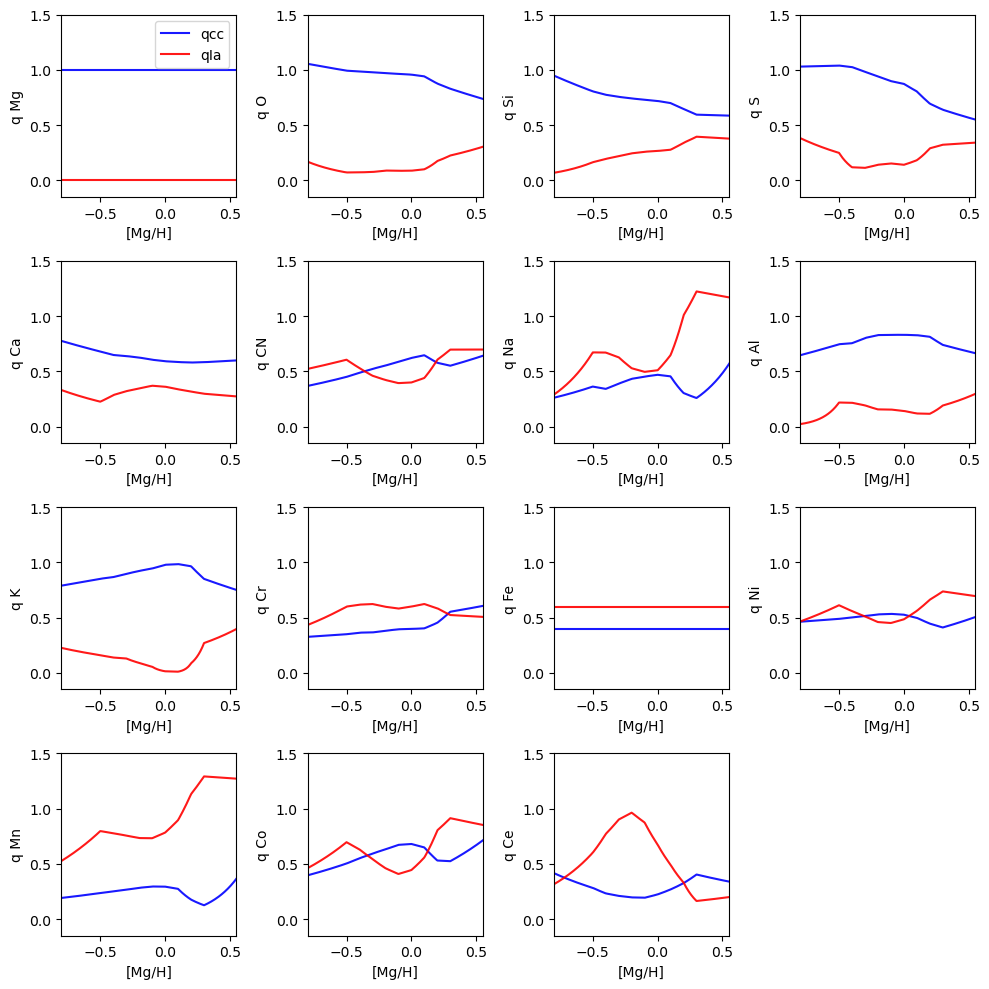

In [10]:
kpm.plot_qs(data, fixed, fit)

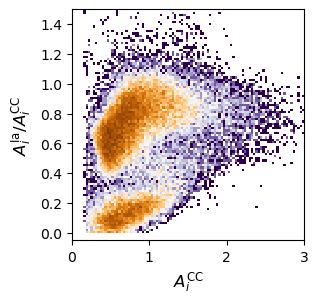

In [11]:
kpm.plot_As(fit)

/Users/emilygriffith/KProcessModel/API/kpm/visualize.py:80: RuntimeWarning: divide by zero encountered in divide
  synthnoise = _RNG2.normal(size=synthdata.shape) / data.sqrt_allivars


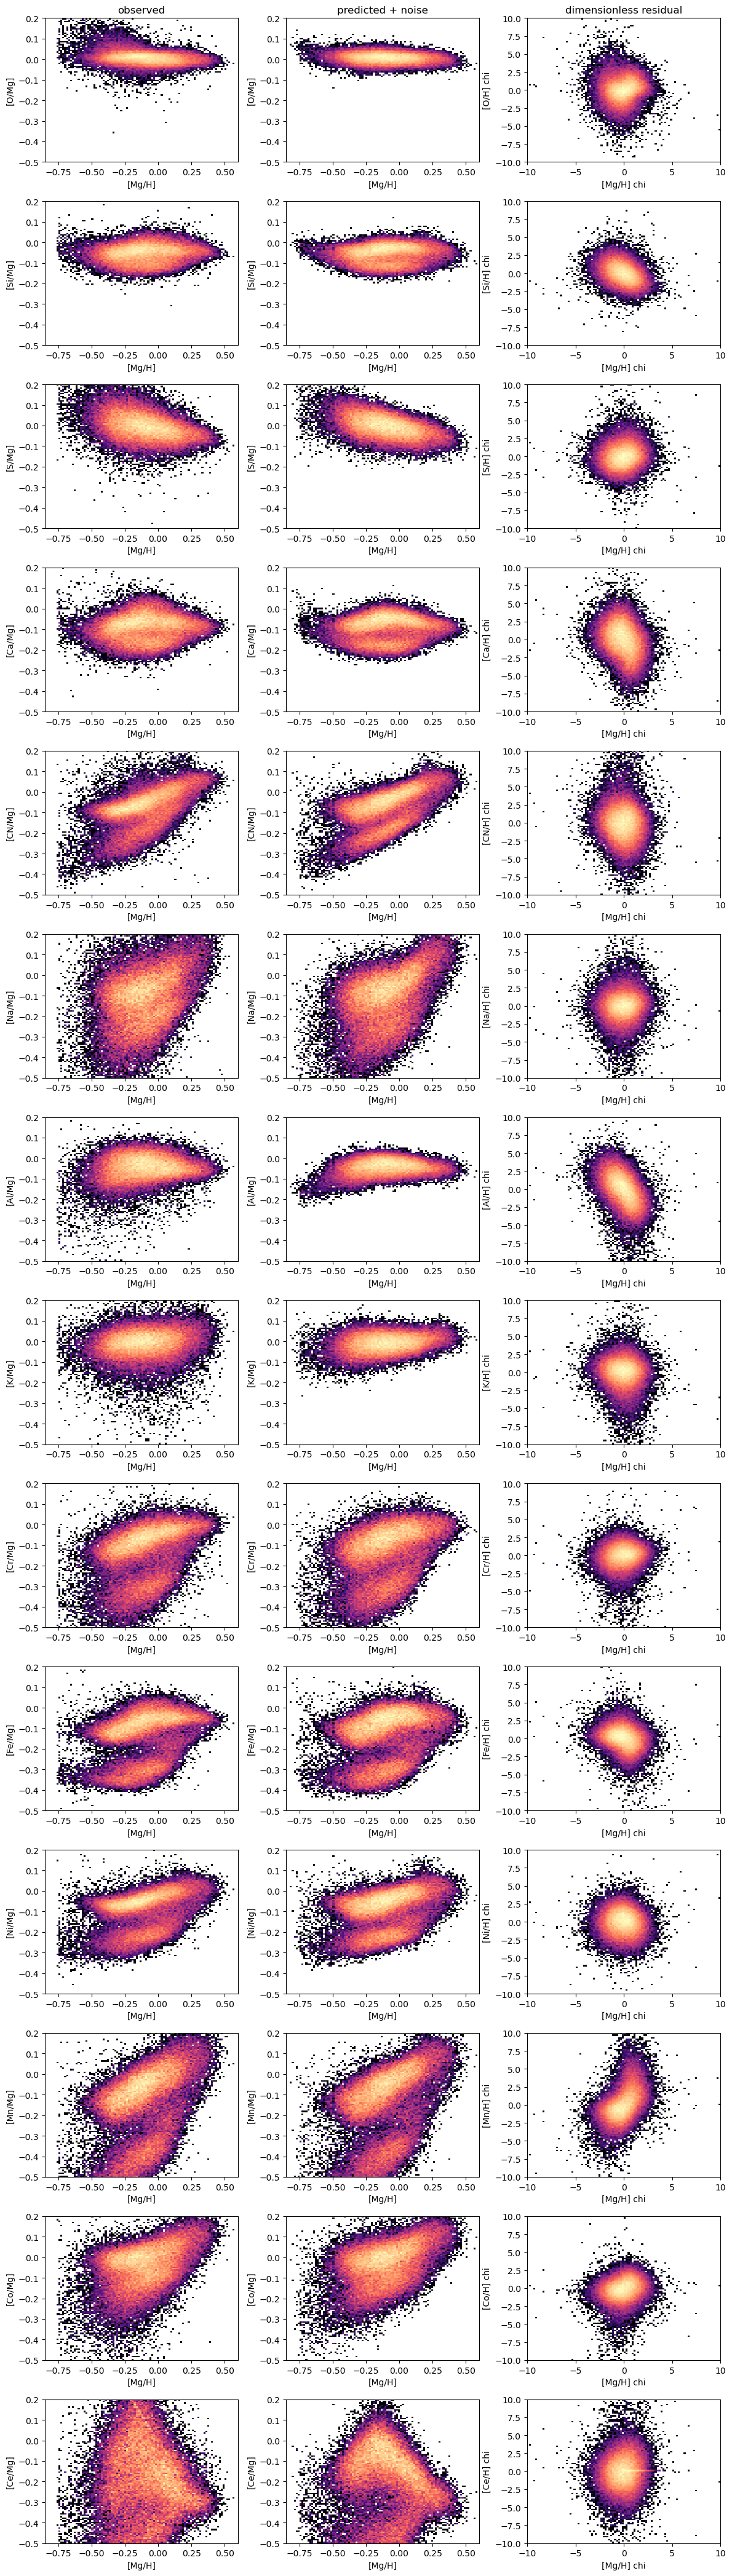

In [12]:
kpm.plot_model_abundances(data, fixed, fit, noise=True)